In [400]:
import numpy as np
import random
import matplotlib.pyplot as plt

## BattleShip 

### Information

#### Dimensions: 10x10

#### Ships:

#### - Carrier: 5 pegs
#### - Battleship: 4 pegs
#### - Cruiser: 3 pegs
#### - Subamarine: 3 pegs
#### - Destroyer: 2 pegs

In [401]:
ships = {
    "Carrier" : 5,
    "Battleship" : 4,
    "Cruiser" : 3,
    "Submarine" : 3,
    "Destroyer" : 2
}

In [402]:
def get_coord(input_msg):
    ship_coord = tuple(input(input_msg))
    x = ship_coord[0]
    x = int(x)
    y = ship_coord[1]
    y = int(y)
    return (x, y)

In [403]:
def random_place_ships():
    your_ships = np.zeros((10, 10))
    for ship in ships:
        ship_size = ships[ship]
        right_placements = []
        down_placements = []
        for x in range(10):
            for y in range(10):
                end_d = x + ship_size
                end_r = y + ship_size
                if end_d <= 10 and 2 not in your_ships[:,y][x:end_d]:
                    down_placements.append((x, y))
                if end_r <= 10 and 2 not in your_ships[x][y:end_r]:
                    right_placements.append((x, y))
        if (len(down_placements) > 0 and len(right_placements) > 0):
            d_or_r = random.randint(0, 1)
            if (d_or_r == 1):
                x, y = down_placements[random.randint(0, len(down_placements)- 1)]
                end = x + ship_size
                your_ships[:,y][x:end] = 2
            else:
                x, y = right_placements[random.randint(0, len(right_placements)- 1)]
                end = y + ship_size
                your_ships[x][y:end] = 2
                
    return your_ships

In [404]:
def get_available_shots(ships):
    shots = []
    for i in range(100):
        x, y = reverse_map(i)
        if (ships[x][y] != 1):
            shots.append(i)
    return shots

In [405]:
def fire_shot_q(state, epsilon, Q, ships):
    chance = np.random.rand()
    legal_shots = get_available_shots(ships)
    if chance < epsilon:
        return np.random.choice(legal_shots)
    max_action = legal_shots[0]
    for a in legal_shots:
        if Q[state][a] > Q[state][max_action]:
            max_action = a
    return max_action

In [406]:
def over(your_ships, opponent_ships):
    return 2 not in your_ships or 2 not in opponent_ships

In [407]:
def reverse_map(observation):
    return observation//10, observation%10

In [408]:
def shot_hit(a, ships, R):
    x, y = reverse_map(a)
    tile = ships[x][y]
    ships[x][y] = 1
    if (tile == 2):
        R[a] += 50
        return True
    return False

def q_learning(a, s, ships, R, U, Q):
    shot_hit(a, ships, R)
    learning_rate = 1 / (1 + U[s, a])
    Q[s][a] = Q[s][a] + learning_rate * (R[a][0] + gamma * np.max(Q[a]) - Q[s][a])
    U[s][a] += 1


In [409]:
def copy_placements(ships):
    copy_ships = np.zeros((10, 10))
    for x in range(10):
        for y in range(10):
            copy_ships[x][y] = ships[x][y]
    return copy_ships

In [410]:
ships1 = random_place_ships()
ships2 = random_place_ships()

In [411]:
def average_results(results, step):
    average_results = []
    for i in range(len(results)):
        if i % step == 0 and i > 0:
            average_results.append(np.mean(results[i - step:i]))
    return average_results

In [412]:
def run_round_q(s, Q, R, U, e, ships):
    a = fire_shot_q(s, e, Q, ships)
    q_learning(a, s, ships, R, U, Q)
    return a

22
0.7727272727272727


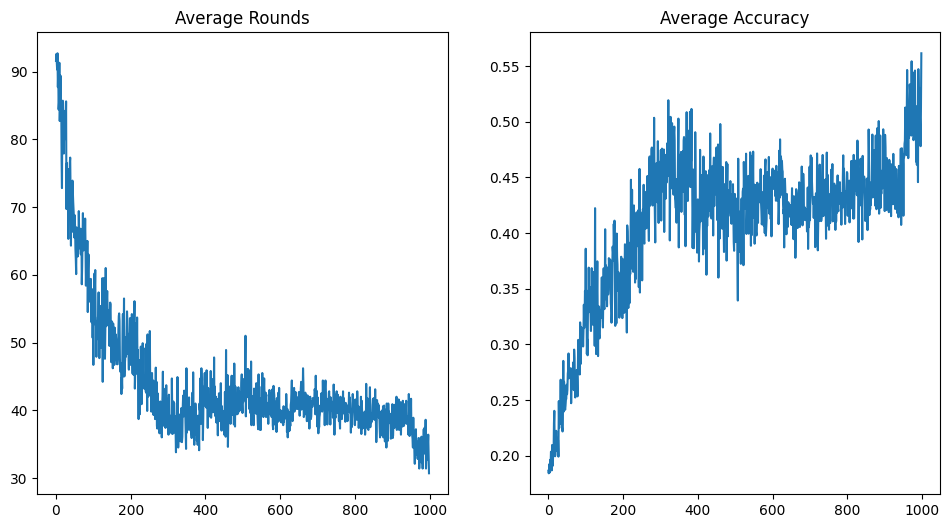

In [413]:
rounds = []
accuracy = []
e = 0.9
gamma = 0.9
Q1 = np.zeros((100, 100))
R1 = np.zeros((100, 1))
U1 = np.zeros((100, 100))

Q2 = np.zeros((100, 100))
R2 = np.zeros((100, 1))
U2 = np.zeros((100, 100))
for i in range(10000):
    s1 = random.randint(0, 99)
    s2 = random.randint(0, 99)
    num_rounds = 0
    your_ships = copy_placements(ships1)
    opponent_ships = copy_placements(ships2)
    while(not over(your_ships, opponent_ships)):
        s1 = run_round_q(s1, Q1, R1, U1, e, your_ships)
        s2 = run_round_q(s2, Q2, R2, U2, e, opponent_ships)
        e *= 0.99999
        num_rounds += 1
    rounds.append(num_rounds)
    accuracy.append(17 / num_rounds)

average_rounds = average_results(rounds, 10)
average_accuracy = average_results(accuracy, 10)

plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(average_rounds)
plt.title("Average Rounds")

plt.subplot(132)
plt.plot(average_accuracy)
plt.title("Average Accuracy")

print(np.min(rounds))
print(np.max(accuracy))

44
0.38636363636363635


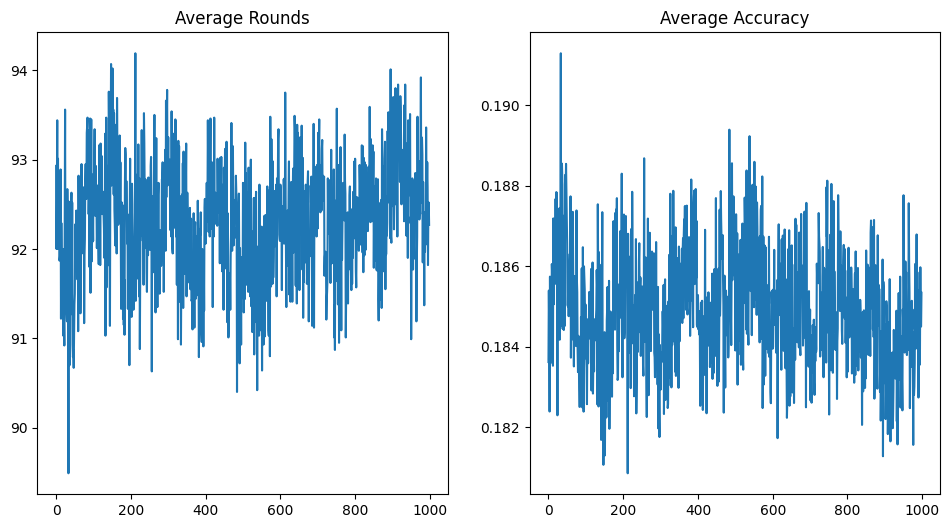

In [414]:
rounds = []
accuracy = []
e = 0.9
gamma = 0.9
Q1 = np.zeros((100, 100))
R1 = np.zeros((100, 1))
U1 = np.zeros((100, 100))

Q2 = np.zeros((100, 100))
R2 = np.zeros((100, 1))
U2 = np.zeros((100, 100))
for i in range(100000):
    s1 = random.randint(0, 99)
    s2 = random.randint(0, 99)
    num_rounds = 0
    your_ships = random_place_ships()
    opponent_ships = random_place_ships()
    while(not over(your_ships, opponent_ships)):
        s1 = run_round_q(s1, Q1, R1, U1, e, your_ships)
        s2 = run_round_q(s2, Q2, R2, U2, e, opponent_ships)
        e *= 0.99999
        num_rounds += 1
    rounds.append(num_rounds)
    accuracy.append(17 / num_rounds)

average_rounds = average_results(rounds, 100)
average_accuracy = average_results(accuracy, 100)

plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(average_rounds)
plt.title("Average Rounds")

plt.subplot(132)
plt.plot(average_accuracy)
plt.title("Average Accuracy")

print(np.min(rounds))
print(np.max(accuracy))

In [415]:
def found_ship(prev_hits):
    n = len(prev_hits)
    if n > 1:
        shot_difference = abs(prev_hits[n - 1] - prev_hits[n - 2])
        return shot_difference == 1 or shot_difference == 10
    return False

def fire_shot_sarsa(state, Q, ships, prev_hits):
    legal_shots = get_available_shots(ships)
    if (len(legal_shots) == 0):
        return None
    n = len(prev_hits)
    was_hit = False
    if (n > 0):
        was_hit = prev_hits[n- 1] == state
    if (was_hit):
        neighbors = []
        if state + 10 in legal_shots:
            neighbors.append(state + 10)
        if state - 10 in legal_shots:
            neighbors.append(state - 10)
        if state + 1 in legal_shots:
            neighbors.append(state + 1)
        if state - 1 in legal_shots:
            neighbors.append(state - 1)
        if (found_ship(prev_hits) and state + (prev_hits[n - 1] - prev_hits[n - 2]) in neighbors):
            return state + (prev_hits[n - 1] - prev_hits[n - 2]) 
        if (len(neighbors) != 0):
            return neighbors[random.randint(0, len(neighbors) - 1)]
    max_action = legal_shots[0]
    for a in legal_shots:
        if Q[state][a] > Q[state][max_action]:
            max_action = a
    return max_action

In [416]:
def sarsa(s, a, a_next, ships, R, U, Q):
    learning_rate = 1 / (1 + U[s, a])
    Q[s][a] = Q[s][a] + learning_rate * (R[a][0] + gamma * Q[a][a_next] - Q[s][a])
    U[s][a] += 1

In [417]:
def run_round_sarsa(s, a, ships, Q, R, U, prev_hits):
    hit = 0
    if (shot_hit(a, ships, R)):
        hit = 1
        prev_hits.append(a)
    a_next = fire_shot_sarsa(a, Q, ships, prev_hits)
    if (a_next == None):
        return None
    sarsa(s, a, a_next, ships, R, U, Q)
    return a_next

25
0.68


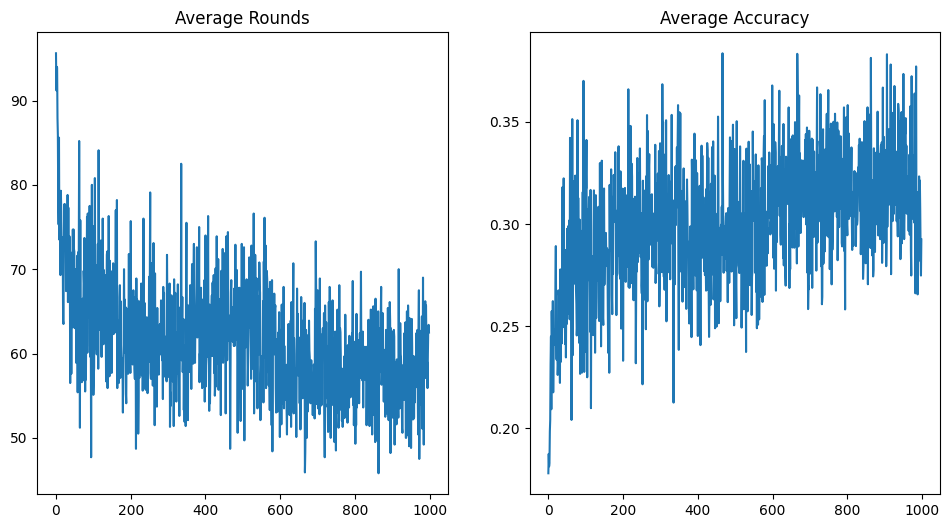

In [418]:
rounds = []
accuracy = []
gamma = 0.9
Q1 = np.zeros((100, 100))
R1 = np.zeros((100, 1))
U1 = np.zeros((100, 100))

Q2 = np.zeros((100, 100))
R2 = np.zeros((100, 1))
U2 = np.zeros((100, 100))
for i in range(10000):
    your_ships = copy_placements(ships1)
    opponent_ships = copy_placements(ships2)
    s1 = random.randint(0, 99)
    s2 = random.randint(0, 99)
    prev_hits1 = []
    prev_hits2 = []
    a1 = fire_shot_sarsa(s1, Q1, your_ships, prev_hits1)
    a2 = fire_shot_sarsa(s2, Q2, opponent_ships, prev_hits2)
    num_rounds = 0
    while(not over(your_ships, opponent_ships)):
        a1_next = run_round_sarsa(s1, a1, your_ships, Q1, R1, U1, prev_hits1)
        if (a1_next == None):
            break
        s1 = a1
        a1 = a1_next
        a2_next = run_round_sarsa(s2, a2, opponent_ships, Q2, R2, U2, prev_hits2)
        if (a2_next == None):
            break
        s2 = a2
        a2_next = a2
        num_rounds += 1
    rounds.append(num_rounds)
    accuracy.append(17 / num_rounds)

average_rounds = average_results(rounds, 10)
average_accuracy = average_results(accuracy, 10)

plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(average_rounds)
plt.title("Average Rounds")

plt.subplot(132)
plt.plot(average_accuracy)
plt.title("Average Accuracy")

print(np.min(rounds))
print(np.max(accuracy))

29
0.5862068965517241


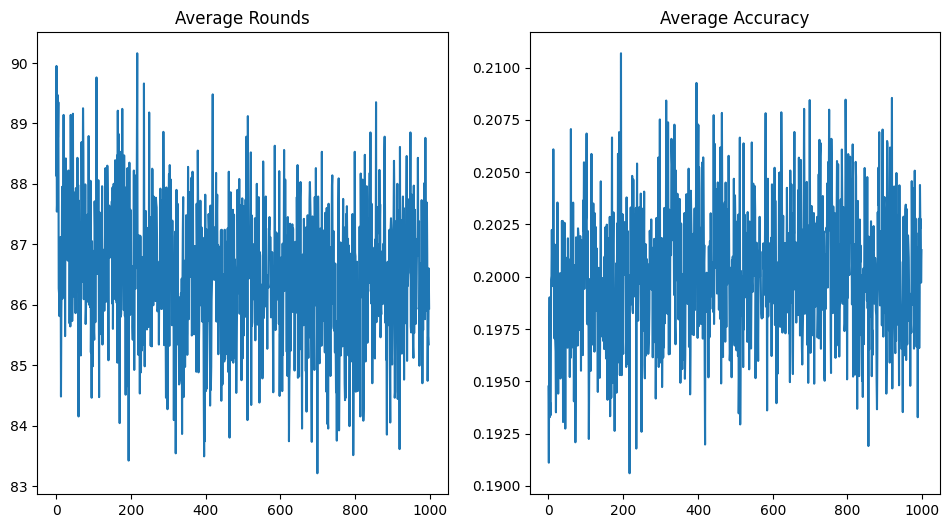

In [419]:
rounds = []
accuracy = []
gamma = 0.9
Q1 = np.zeros((100, 100))
R1 = np.zeros((100, 1))
U1 = np.zeros((100, 100))

Q2 = np.zeros((100, 100))
R2 = np.zeros((100, 1))
U2 = np.zeros((100, 100))
for i in range(100000):
    your_ships = random_place_ships()
    opponent_ships = random_place_ships()
    s1 = random.randint(0, 99)
    s2 = random.randint(0, 99)
    prev_hits1 = []
    prev_hits2 = []
    a1 = fire_shot_sarsa(s1, Q1, your_ships, prev_hits1)
    a2 = fire_shot_sarsa(s2, Q2, opponent_ships, prev_hits2)
    num_rounds = 0
    while(not over(your_ships, opponent_ships)):
        a1_next = run_round_sarsa(s1, a1, your_ships, Q1, R1, U1, prev_hits1)
        if (a1_next == None):
            break
        s1 = a1
        a1 = a1_next
        a2_next = run_round_sarsa(s2, a2, opponent_ships, Q2, R2, U2, prev_hits2)
        if (a2_next == None):
            break
        s2 = a2
        a2_next = a2
        num_rounds += 1
    rounds.append(num_rounds)
    accuracy.append(17 / num_rounds)

average_rounds = average_results(rounds, 100)
average_accuracy = average_results(accuracy, 100)

plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(average_rounds)
plt.title("Average Rounds")

plt.subplot(132)
plt.plot(average_accuracy)
plt.title("Average Accuracy")

print(np.min(rounds))
print(np.max(accuracy))